# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [2]:
labels_full = data[:,0]
A_full = data[:,1:].transpose()
labels_full.shape, A_full.shape

((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels

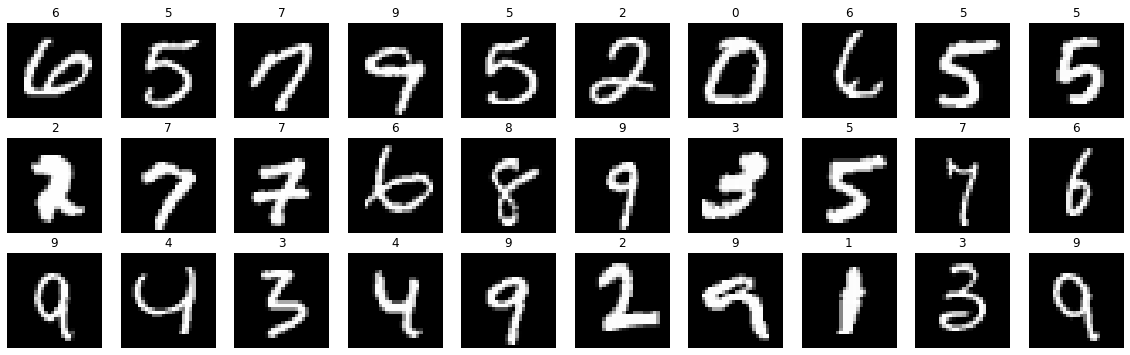

In [3]:
fig, axs = plt.subplots(ncols = 10, nrows = 3, figsize = (20,6))
axs = axs.reshape((-1,))
for i in range(30):
  image_i = A_full[:,i].reshape((28,28))
  axs[i].imshow(image_i, cmap='gray')
  axs[i].set_title(int(labels_full[i]))
  axs[i].axis('off')

Visualize the first 30 pictures corresponding the the digit "9"

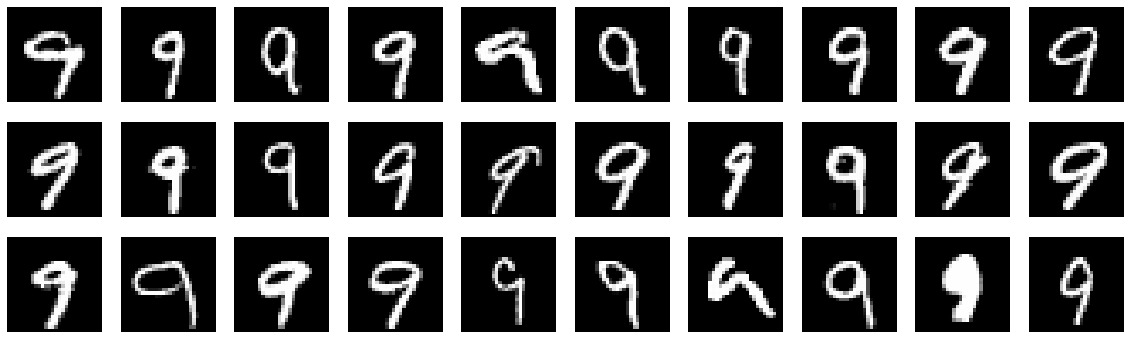

In [4]:
A_filtered = A_full[:, labels_full == 9]
fig, axs = plt.subplots(ncols = 10, nrows = 3, figsize = (20,6))
axs = axs.reshape((-1,))
for i in range(30):
  image_i = A_filtered[:,i].reshape((28,28))
  axs[i].imshow(image_i, cmap='gray')
  axs[i].axis('off')

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [5]:
digits = (0, 9)
mask = np.logical_or(labels_full == digits[0], labels_full == digits[1])
A = A_full[:, mask]
labels = labels_full[mask]

Plot the first 30 training images. 

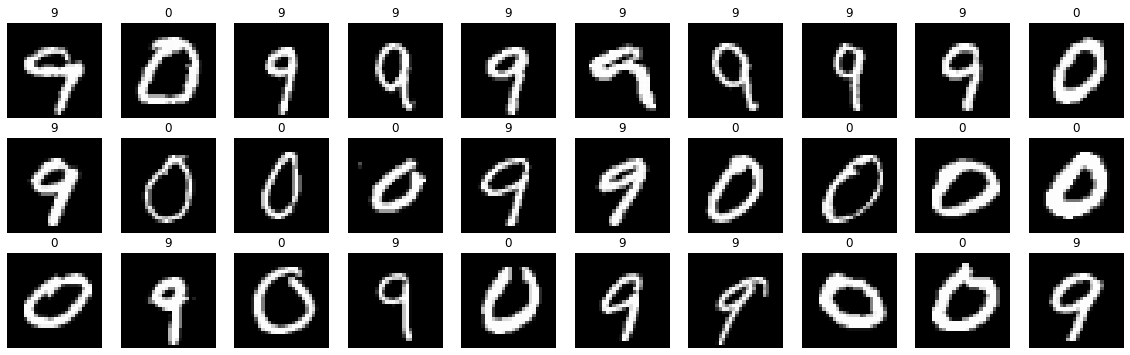

In [6]:
fig, axs = plt.subplots(nrows = 3, ncols = 10, figsize = (20,6))
axs = axs.reshape((-1,))
for i in range(len(axs)):
  image_i = A[:,i].reshape((28,28))
  axs[i].imshow(image_i, cmap = 'gray')
  axs[i].set_title(int(labels[i]))
  axs[i].axis('off')

Compute and visualize the average of the training data

(-0.5, 27.5, 27.5, -0.5)

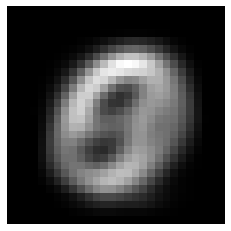

In [7]:
A_mean = A.mean(axis = 1)
plt.imshow(A_mean.reshape((28,28)), cmap = 'gray')
plt.axis('off')

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

Text(0.5, 1.0, 'Explained variance')

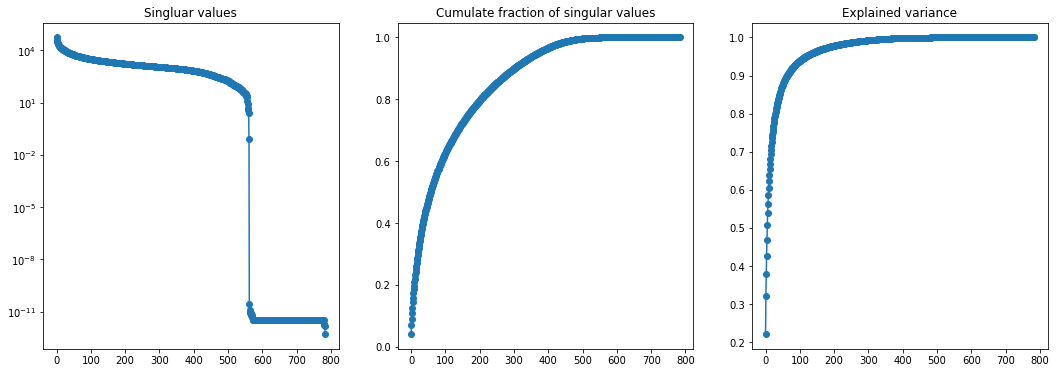

In [8]:
U, s, VT = np.linalg.svd(A - A_mean[:,None], full_matrices = False)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))

axes[0].semilogy(s, 'o-')
axes[0].set_title('Singluar values')

axes[1].plot(np.cumsum(s)/np.sum(s), 'o-')
axes[1].set_title('Cumulate fraction of singular values')

axes[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o-')
axes[2].set_title('Explained variance')

Visualize the first 30 principal axes

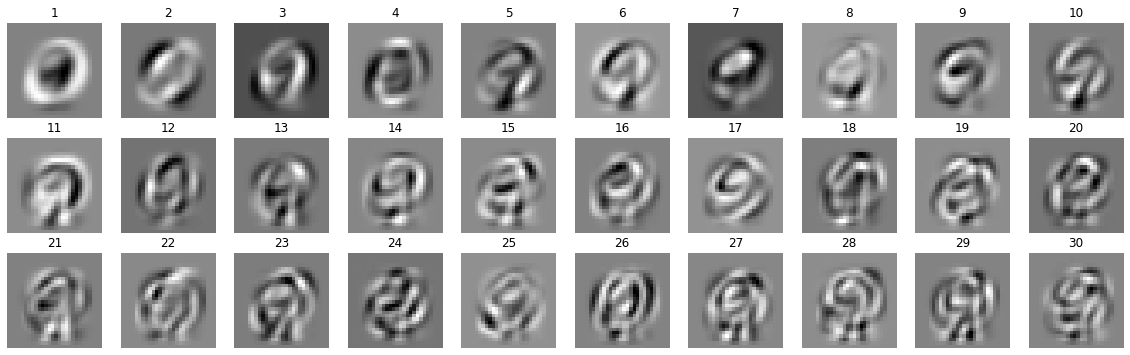

In [9]:
fig, axs = plt.subplots(nrows = 3, ncols = 10, figsize = (20,6))
axs = axs.reshape((-1,))
for i in range(len(axs)):
  image_i = U[:,i].reshape((28,28))
  axs[i].imshow(image_i, cmap = 'gray')
  axs[i].axis('off')
  axs[i].set_title(str(i+1))

Compute the first two principal components corresponding to the first image

In [10]:
print('1st principal component: %f' % np.inner((A[:,0] - A_mean), U[:, 0]))
print('2nd principal component: %f' % np.inner((A[:,0] - A_mean), U[:, 1]))

1st principal component: -529.096415
2nd principal component: -580.860850


Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

In [11]:
A_pc = np.matmul(U.transpose(), (A - A_mean[:,None]))
print('1st principal component: %f' % A_pc[0,0])
print('2nd principal component: %f' % A_pc[1,0])

1st principal component: -529.096415
2nd principal component: -580.860850


Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

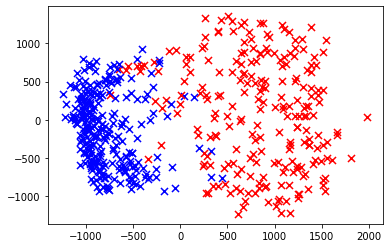

In [12]:
for i in range(500):
  x = np.inner(A[:, i] - A_mean, U[:, 0]) 
  y = np.inner(A[:, i] - A_mean, U[:, 1]) 
  if labels[i] == digits[0]:
    col = 'r'
  else:
    col = 'b'
  plt.scatter(x, y, marker='x', color=col, s=50)

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

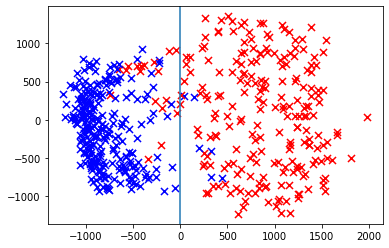

In [19]:
threshold = 0

for i in range(500):
  x = np.inner(A[:, i] - A_mean, U[:, 0]) 
  y = np.inner(A[:, i] - A_mean, U[:, 1]) 
  if labels[i] == digits[0]:
    col = 'r'
  else:
    col = 'b'
  plt.scatter(x, y, marker='x', color=col, s=50)

plt.axvline(threshold)

In [14]:
data_test = np.genfromtxt('sample_data/mnist_test.csv', delimiter=',')
labels_full_test = data_test[:,0]
A_full_test = data_test[:,1:].transpose()
labels_full_test.shape, A_full_test.shape

((10000,), (784, 10000))

In [15]:
mask = np.logical_or(labels_full_test == digits[0], labels_full_test == digits[1])
A_test = A_full_test[:, mask]
labels_test = labels_full_test[mask]
labels_test.shape, A_test.shape

((1989,), (784, 1989))

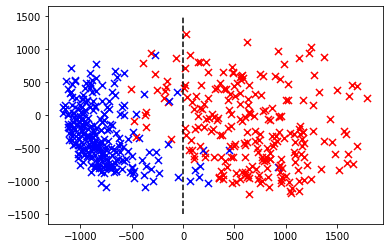

In [16]:
for i in range(500):
  x = np.inner(A_test[:, i] - A_mean, U[:, 0]) 
  y = np.inner(A_test[:, i] - A_mean, U[:, 1]) 
  if labels_test[i] == digits[0]:
    col = 'r'
  else:
    col = 'b'
  plt.scatter(x, y, marker='x', color=col, s=50)

plt.plot([threshold, threshold], [-1500, 1500], 'k--')

In [17]:
PC_1 = np.matmul(U[:, 0].transpose(), (A_test - A_mean[:,None]))

labels_predicted = np.empty(labels_test.shape).astype(int)
labels_predicted[PC_1 > threshold] = digits[0]
labels_predicted[PC_1 <= threshold] = digits[1]

true_0  = np.sum(np.logical_and(labels_test == digits[0], labels_predicted == digits[0]))
false_0 = np.sum(np.logical_and(labels_test == digits[1], labels_predicted == digits[0]))
true_1  = np.sum(np.logical_and(labels_test == digits[1], labels_predicted == digits[1]))
false_1 = np.sum(np.logical_and(labels_test == digits[0], labels_predicted == digits[1]))

print('true  %s: %d' % (digits[0], true_0))
print('false %s: %d' % (digits[0], false_0))
print('true  %s: %d' % (digits[1], true_1))
print('false %s: %d' % (digits[1], false_1))

print('accuracy = %1.2f %%' % ((true_0 + true_1) / (true_0+true_1+false_0+false_1) * 100))

true  0: 927
false 0: 30
true  9: 979
false 9: 53
accuracy = 95.83 %
